In [1]:
# Script for Section 1 – Data exploration and pre-processing 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('RTP_traffic_dataset.csv')

In [5]:
df.head(1)

,timestamp,interarrival_std,interarrival_mean,interarrival_min,interarrival_max,interarrival_count,interarrival_kurtosis,interarrival_skew,interarrival_moment3,interarrival_moment4,...,inter_time_sequence_max_value_count_percent,num_packet_loss,software,ssrc,ip_src,ip_dst,prt_src,prt_dst,p_type,n_call
0,2020-12-14 13:34:39.500,0.011279,0.011439,0.002316,0.02405,3,-1.5,0.513926,4.014318e-07,1.079044e-08,...,0.333333,0,webrtc,0x401fff15,132.145.230.5,192.168.1.126,443,34102,114,1


In [6]:
t_max = df['timestamp'].max()
t_min = df['timestamp'].min()
print('The starting time is:',t_min)
print(' the finishing time is:',t_max)

The starting time is: 2020-04-17 07:59:45.500
 the finishing time is: 2021-01-18 15:03:18.000


In [14]:
# We check both the code of a call and software type to double check that there are no calls with same code and different type of software
#Calls=df['n_call']
#SoftwareType=df['software']
#Counter=0
#Breakpoints=[]
#for i in range(len(Calls)-1):
    #if Calls.loc[i]!=Calls.loc[i+1] or SoftwareType.loc[i]!=SoftwareType.loc[i+1] :
        #Counter=Counter+1
        #Breakpoints.append(i)


In [7]:
df['timestamp']=pd.to_datetime(df['timestamp'])
Durations=[]
P1=df['n_call'].value_counts().sort_index()
for i in P1.index:
    filt=df['n_call']==i
    P=df[filt]
    P=P.set_index(np.array(range(len(P['timestamp'])))) 
    DurationCalls=P.loc[len(P)-1]['timestamp']-P.loc[0]['timestamp']
    Durations.append(DurationCalls)
#print(Durations)
len(Durations)
print(np.array(Durations).mean())


0 days 00:41:22.632352941


In [8]:
print('The number of calls is:',len(P1))

The number of calls is: 68


In [4]:
# Delete equal stat attributes
# Attributes=[]
# for i in range (df.shape[1]):
#     Column=df.iloc[:,i]
#     Clear_Column=len(set(Column))
#     Attributes.append(Clear_Column)
#     print(Clear_Column)




68


In [19]:
# Delete equal stat attributes
print('Are there one attribute features?')
stat_feat= df.iloc[:,1:74].columns
#cnt_zero_feats=df[stat_feat].count()
count_zero_feats = np.count_nonzero(df[stat_feat], axis=0)
any(count_zero_feats==1)

Are there one attribute features?


False

In [3]:
filt2=df['num_packet_loss']==0
df['label']=1
df.loc[filt2,'label']=0

In [26]:
Count_lossy=df['label'].sum()
Count_lossless= len(df['label'])-Count_lossy
print('The lossy transmissions are:',Count_lossy,'The lossless are:',Count_lossless,'out of ',len(df),'time windows')

The lossy transmissions are: 32479 The lossless are: 2105448 out of  2137927 time windows


In [20]:
# some crazy guy has to run it
# for i in stat_feat:
#     sns.histplot(data=df,x=i, hue='label', bins=50, stat='percent',multiple="stack")
#     plt.show()
# for i in stat_feat[0::2]:
#     sns.histplot(data=df,x=i, hue='label', bins=50, stat='percent',multiple="stack")
#     plt.show() 


C:\Users\utente\AppData\Local\Temp\ipykernel_13692\726031400.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


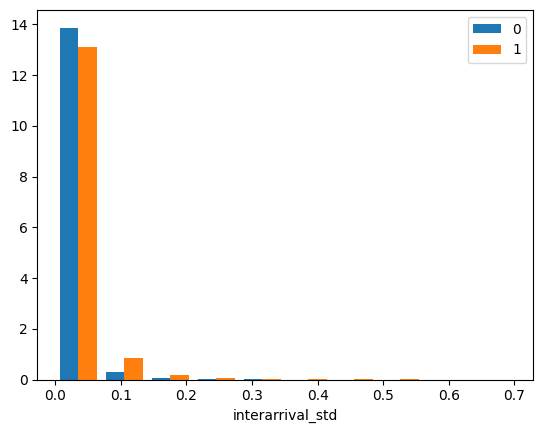

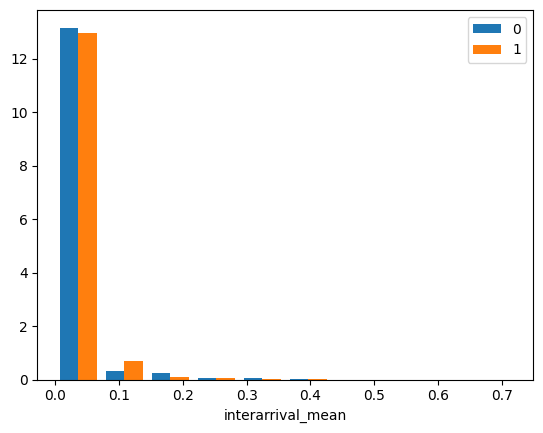

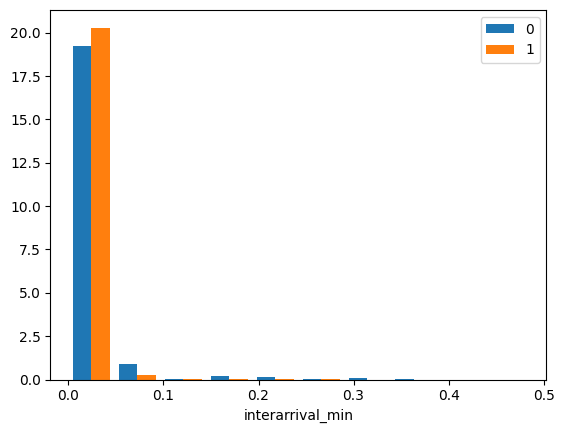

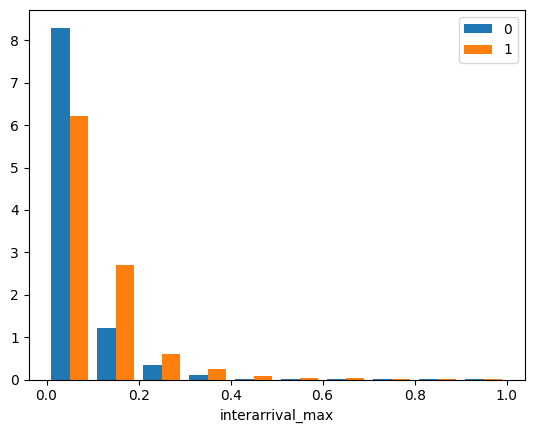

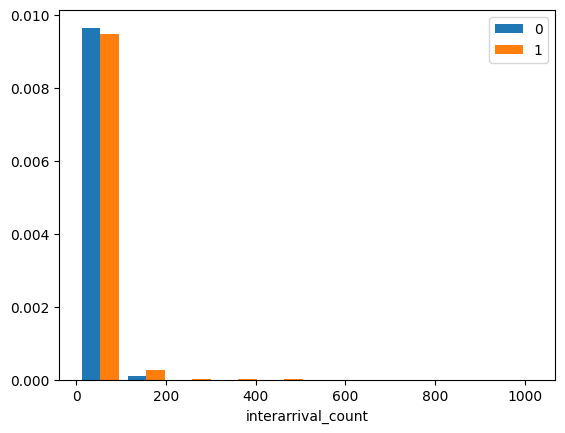

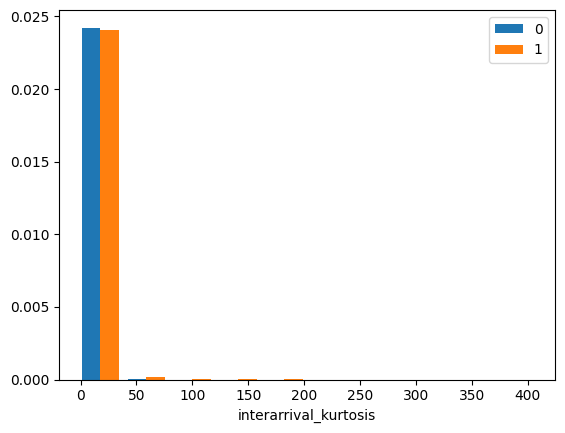

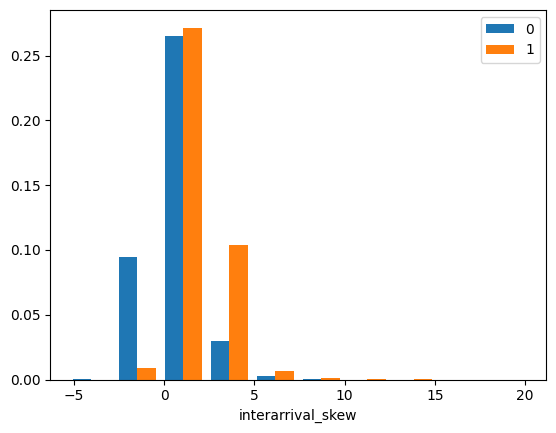

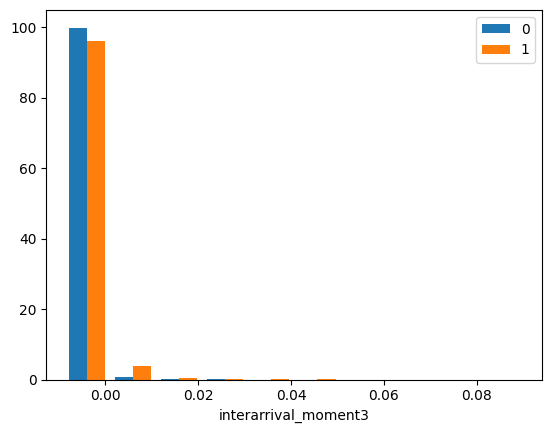

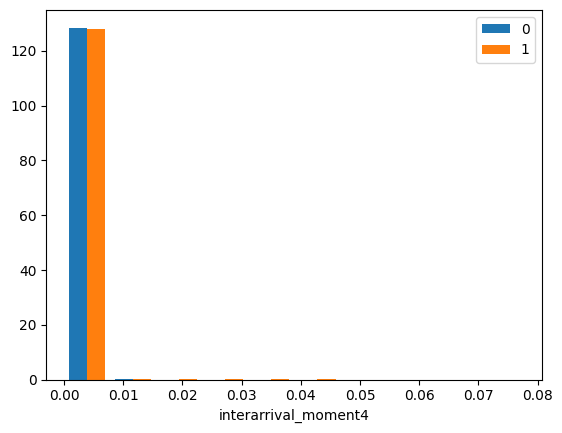

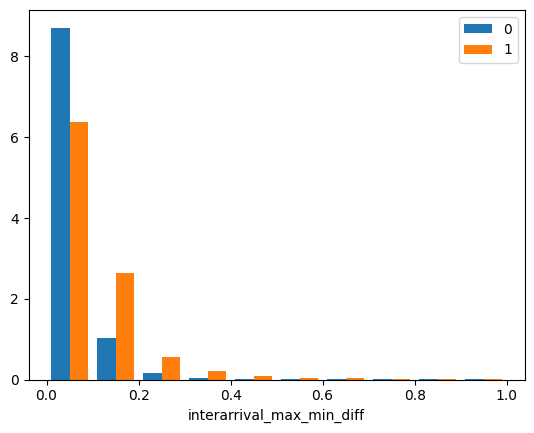

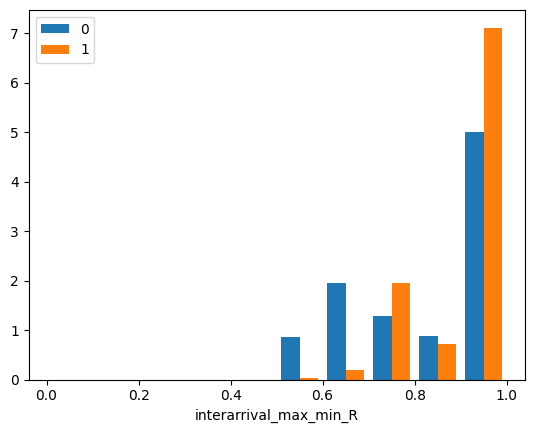

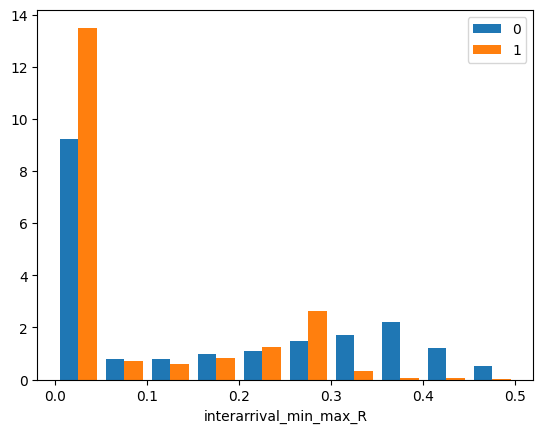

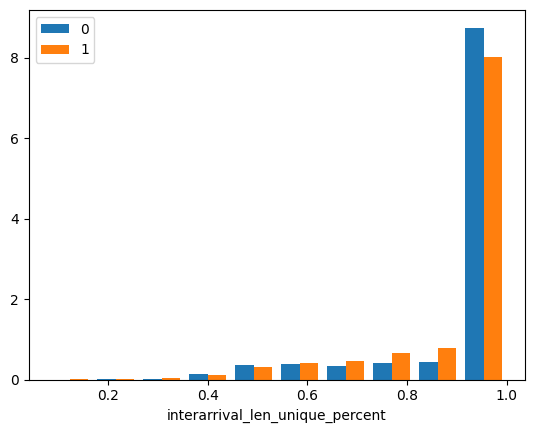

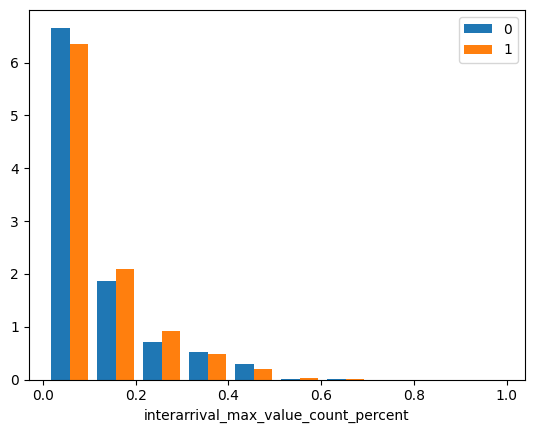

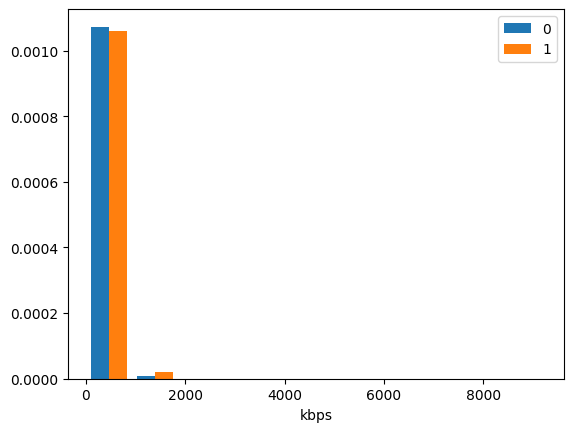

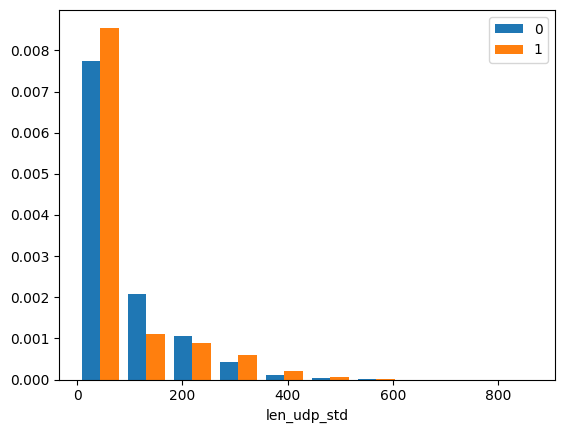

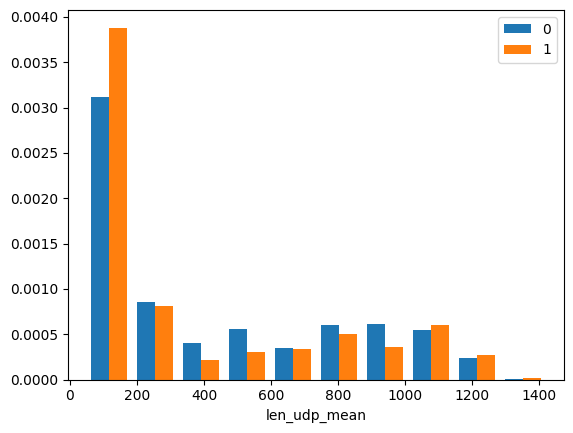

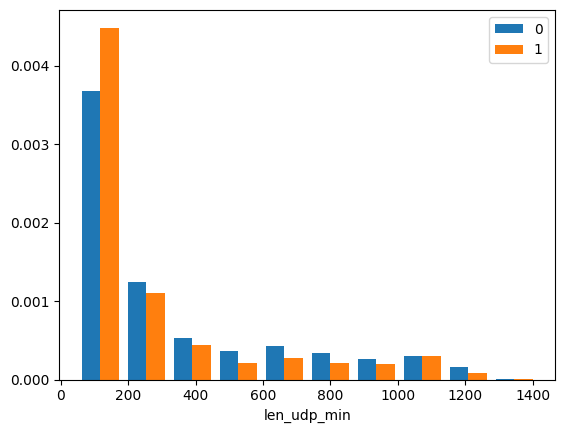

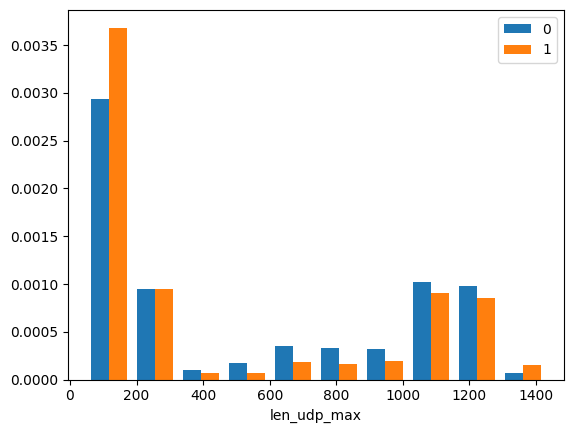

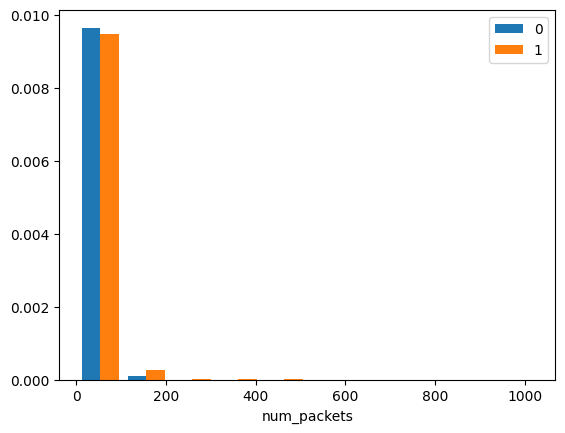

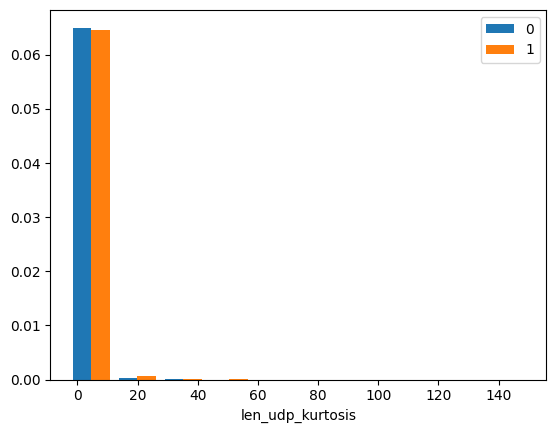

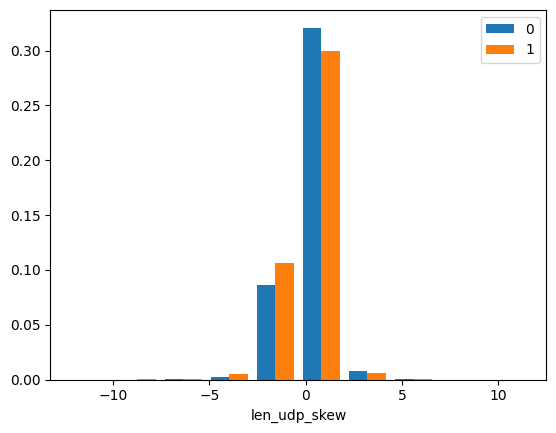

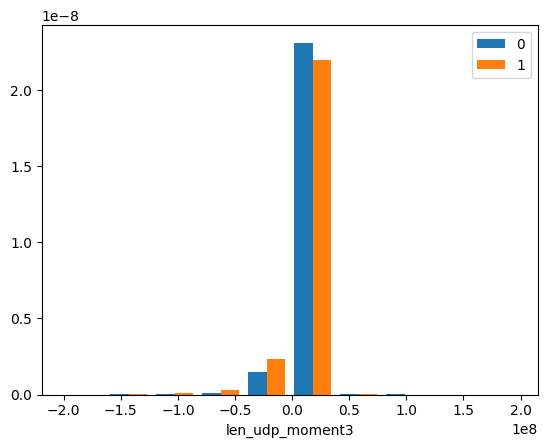

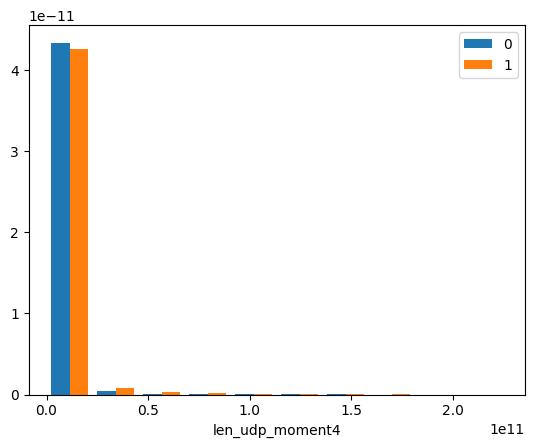

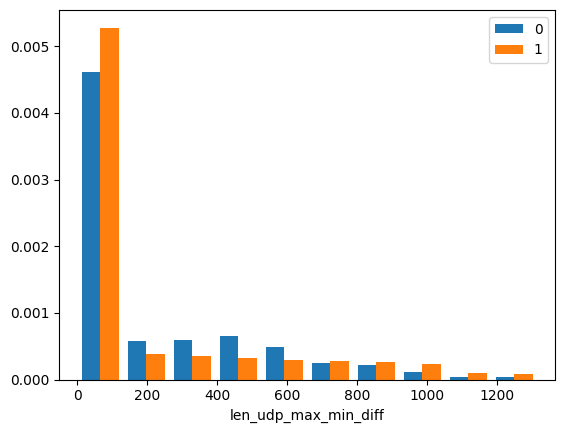

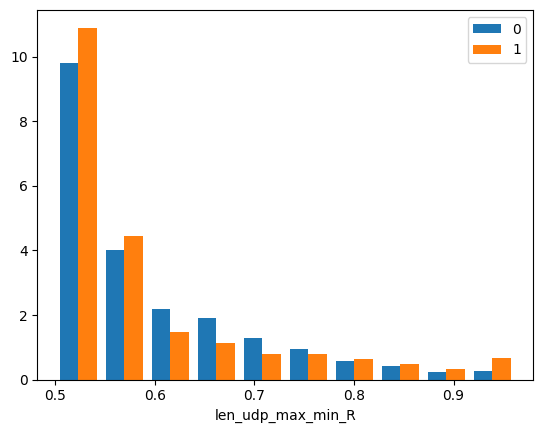

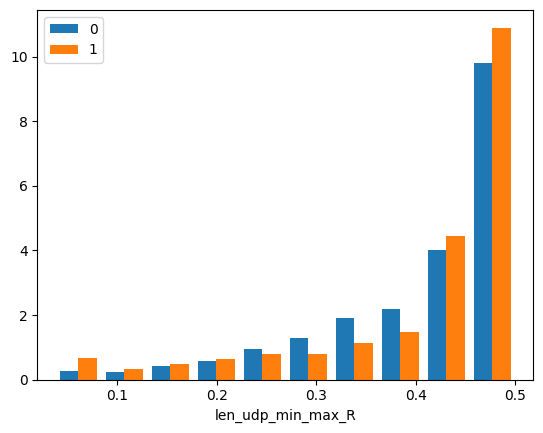

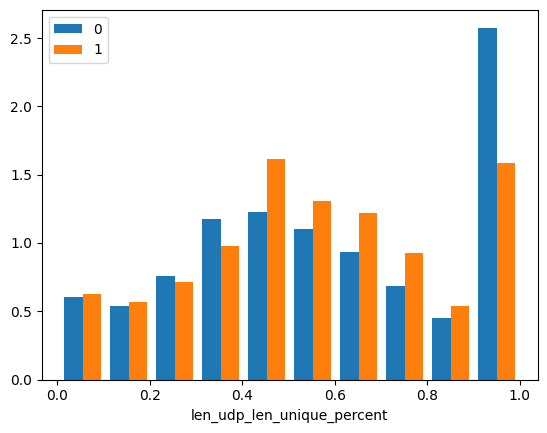

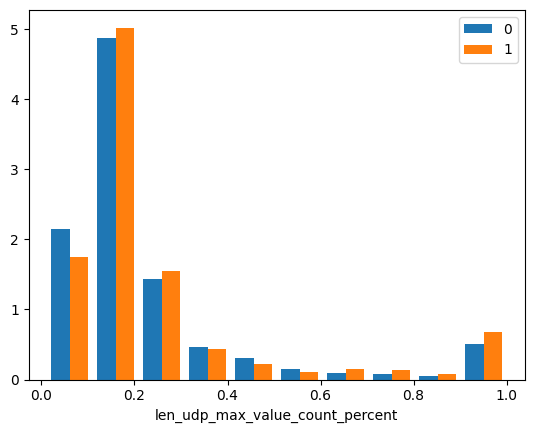

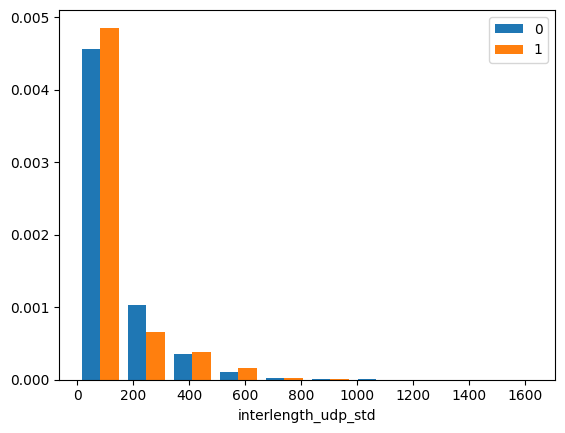

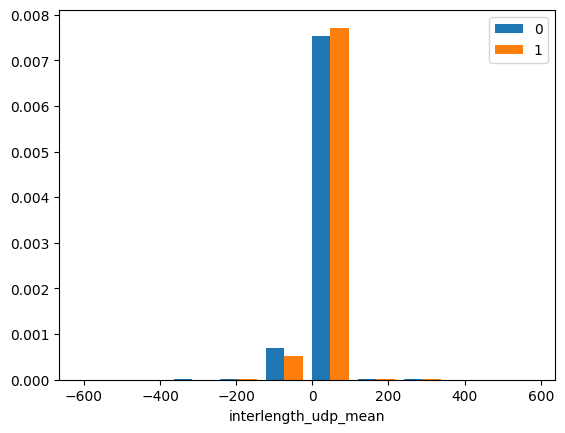

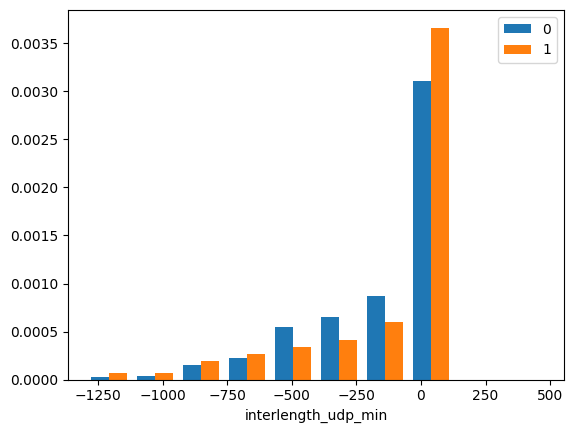

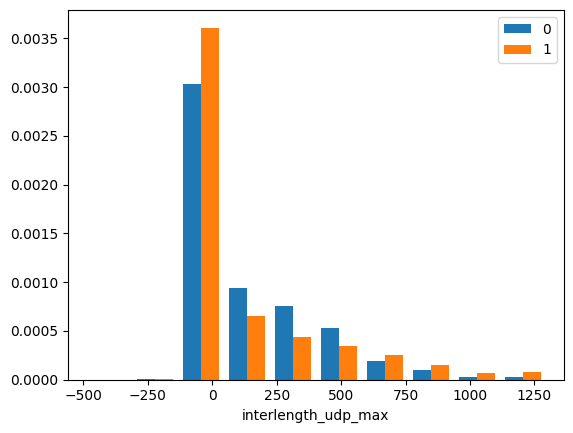

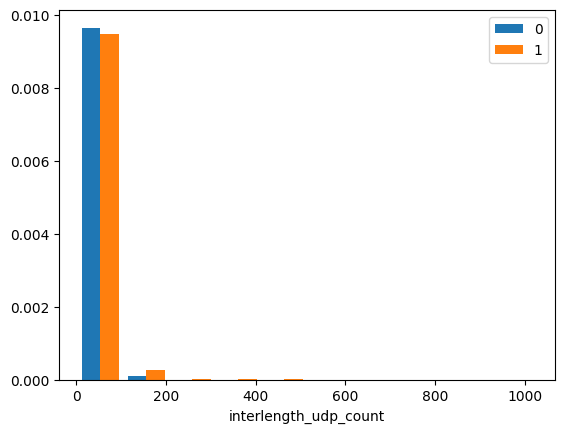

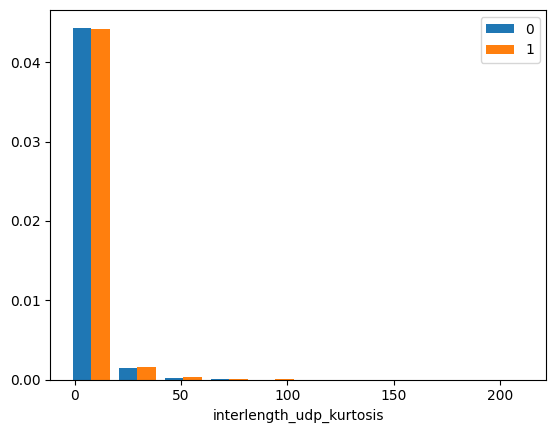

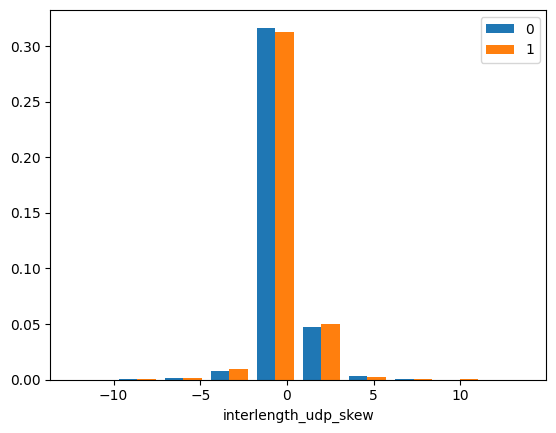

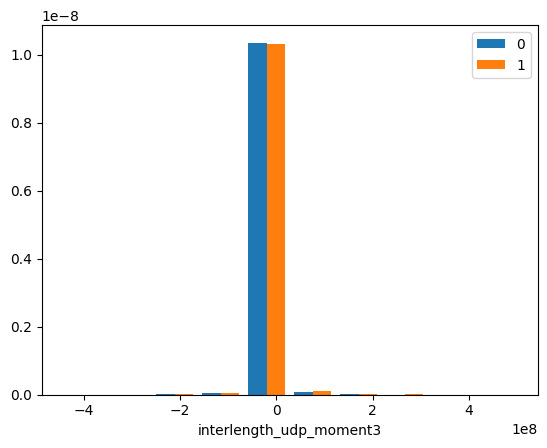

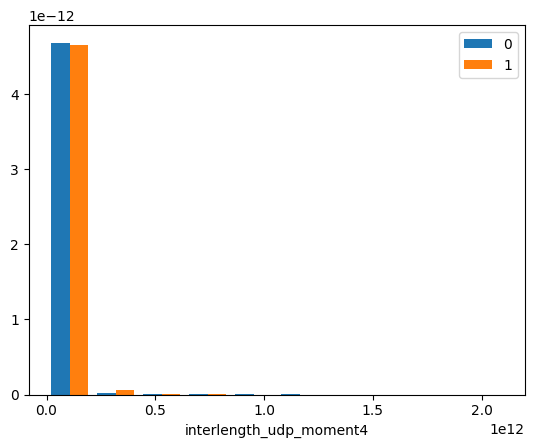

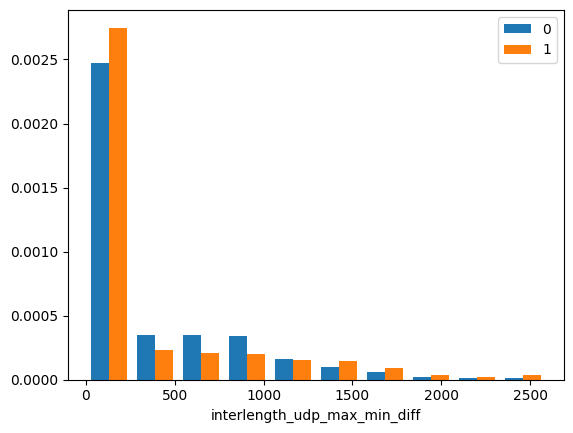

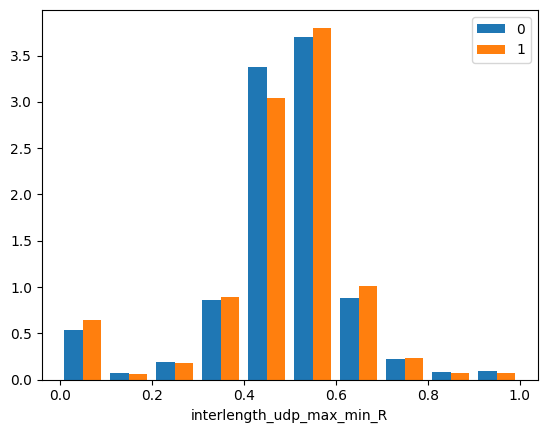

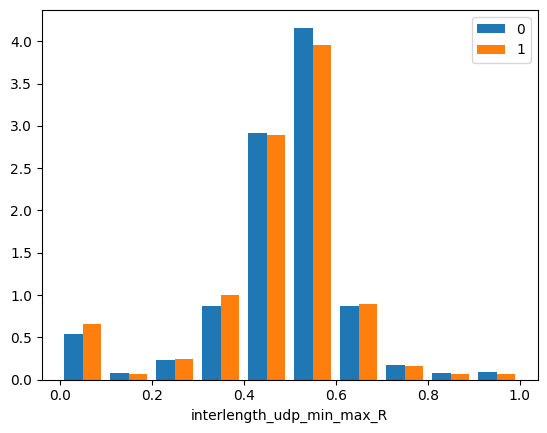

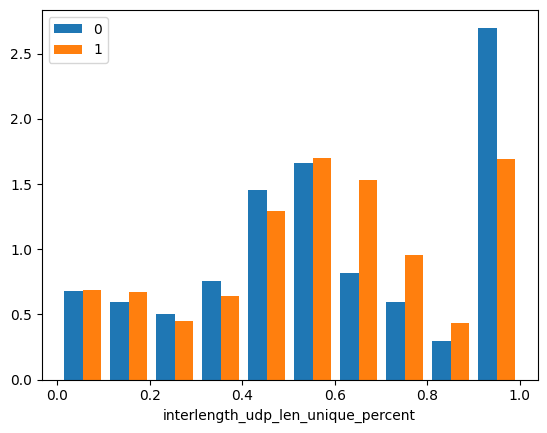

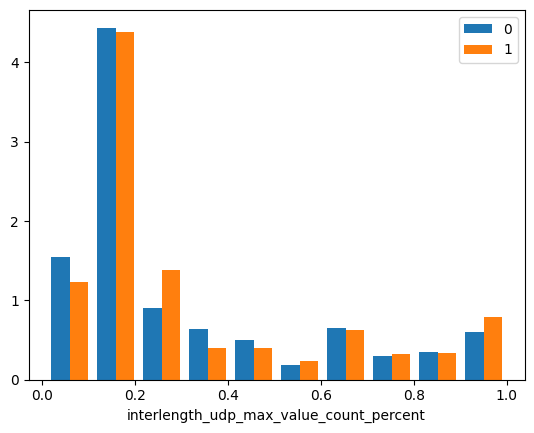

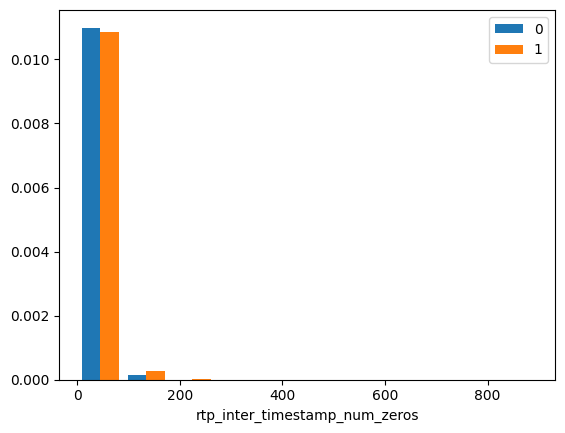

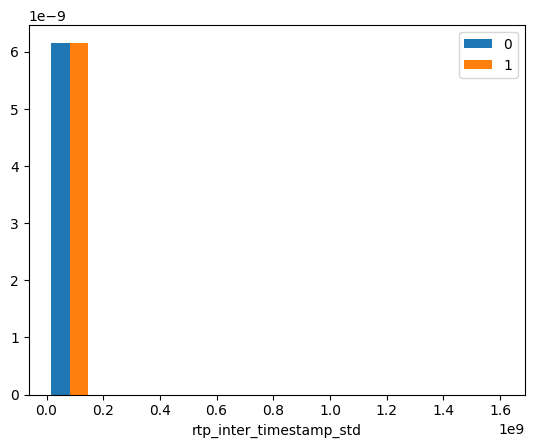

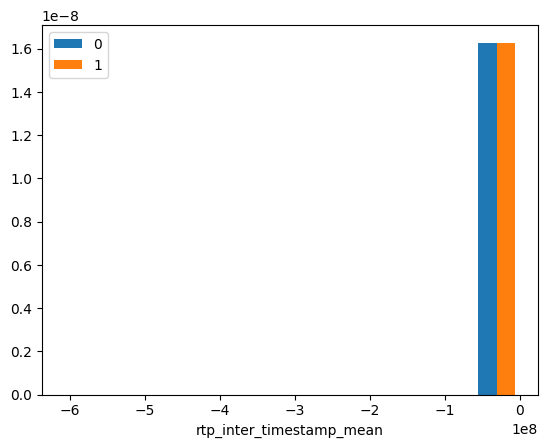

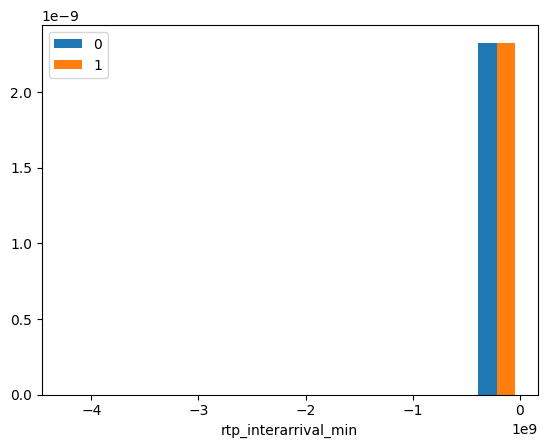

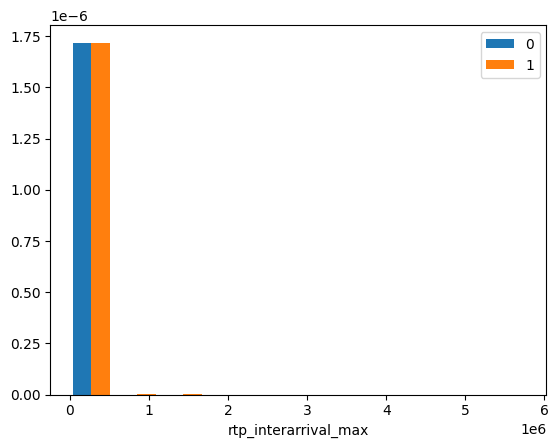

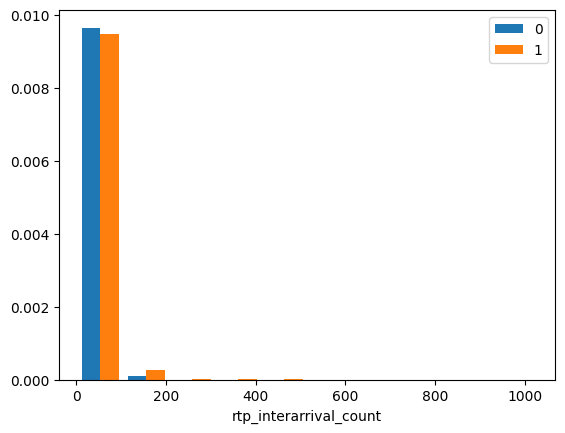

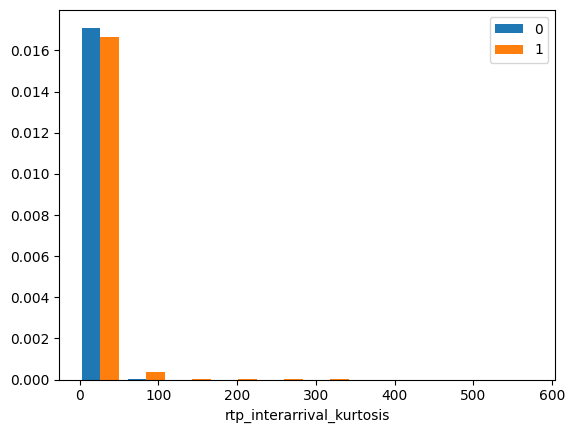

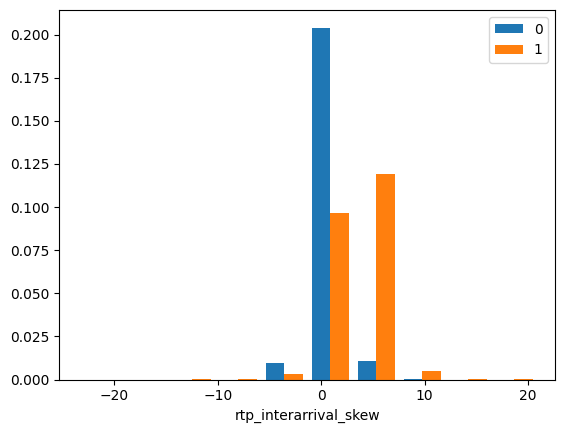

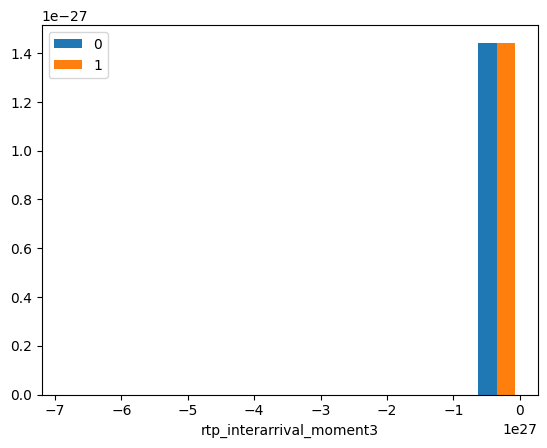

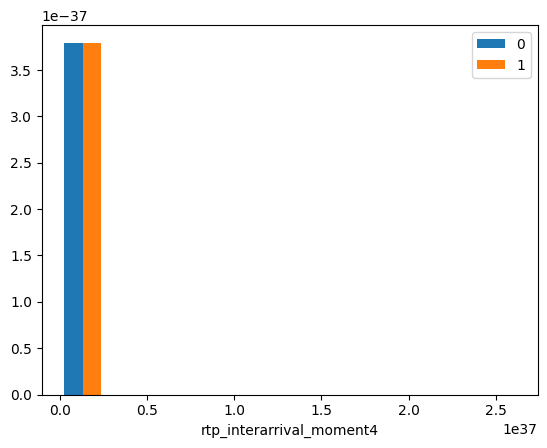

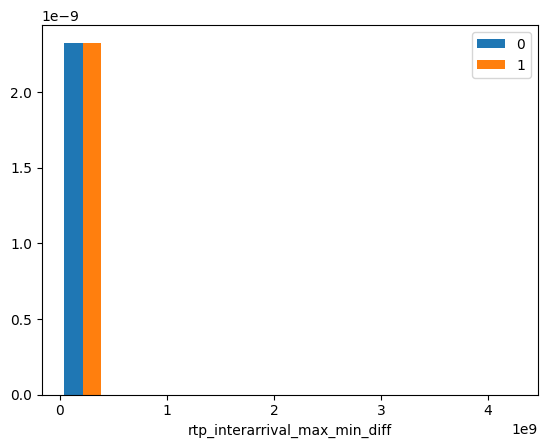

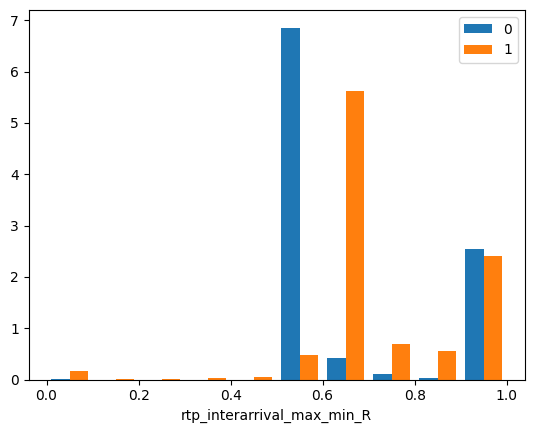

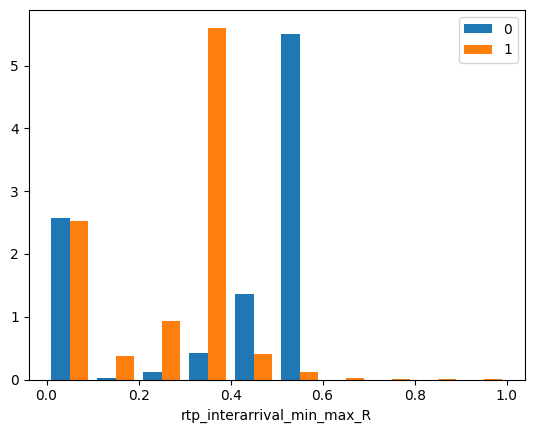

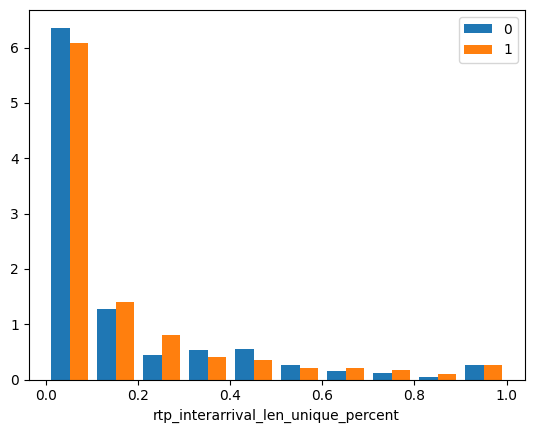

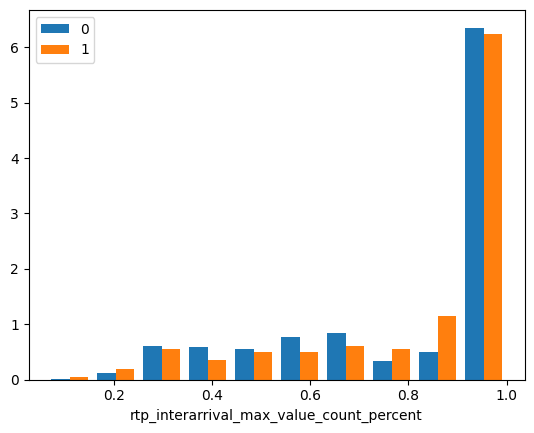

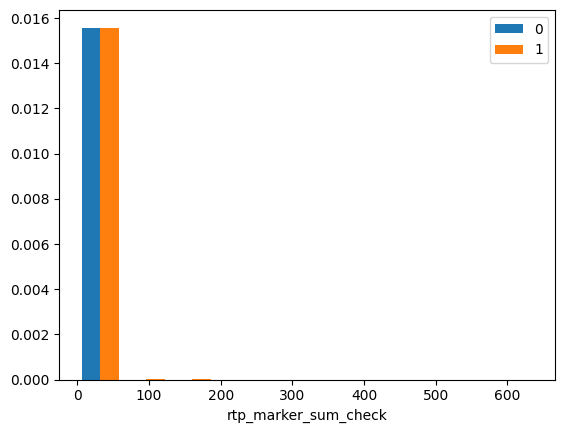

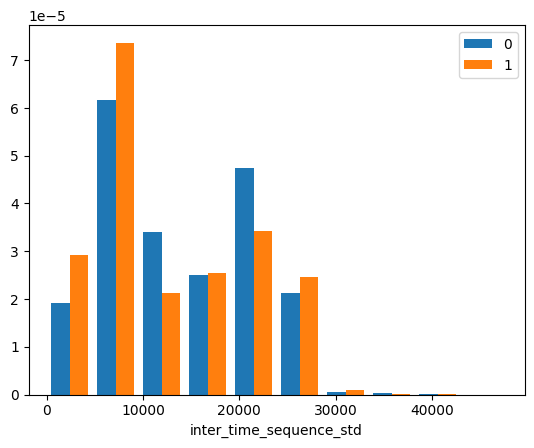

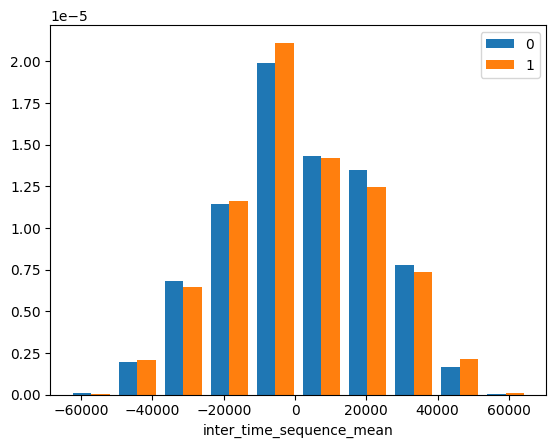

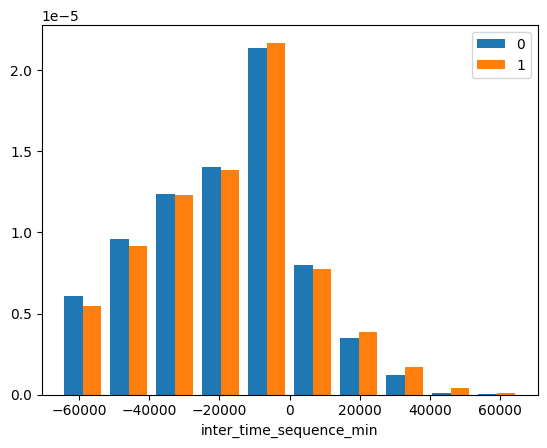

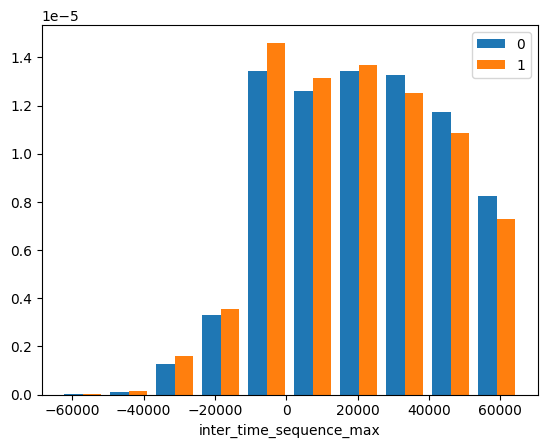

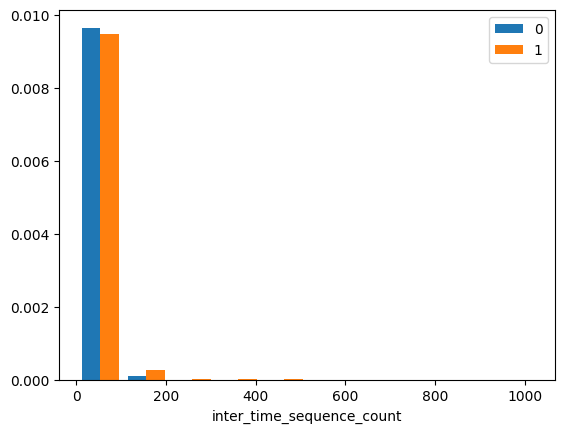

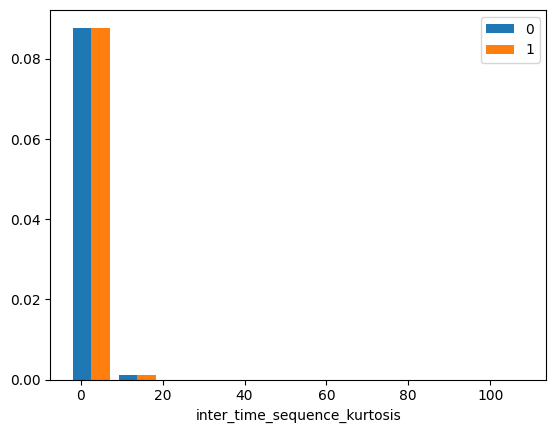

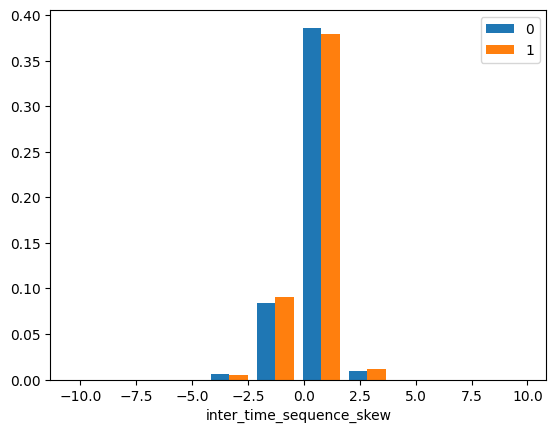

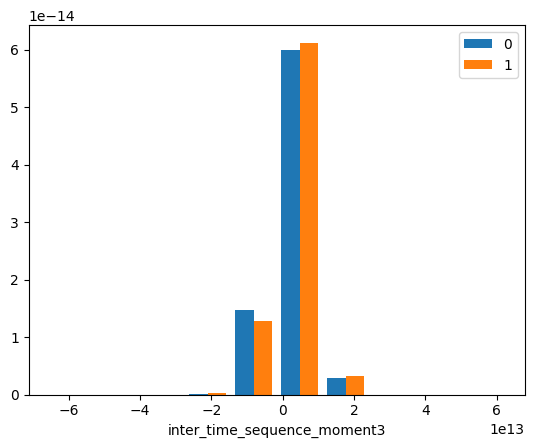

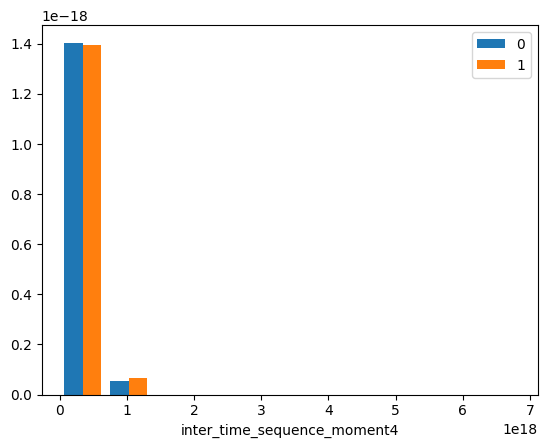

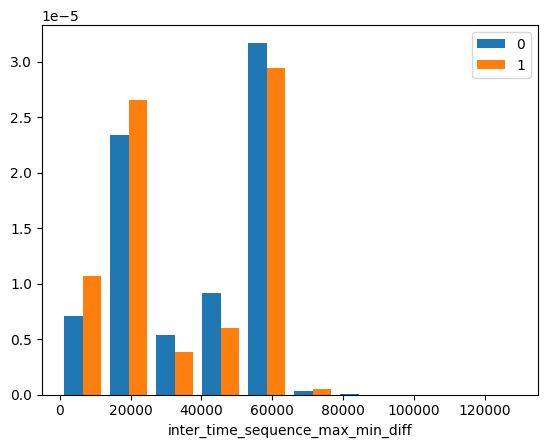

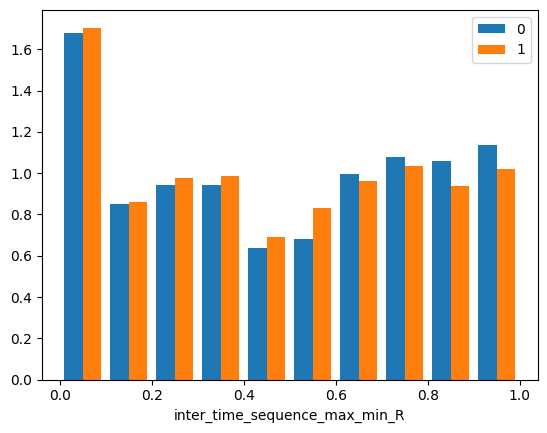

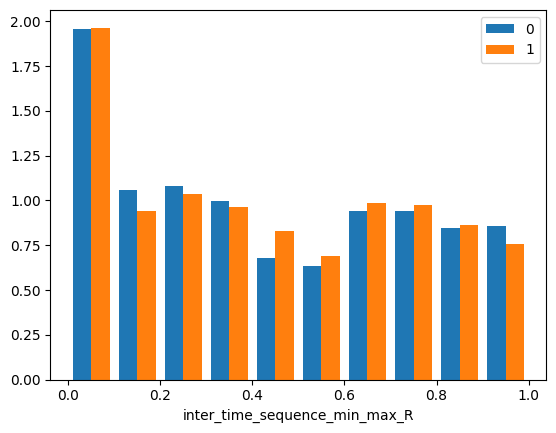

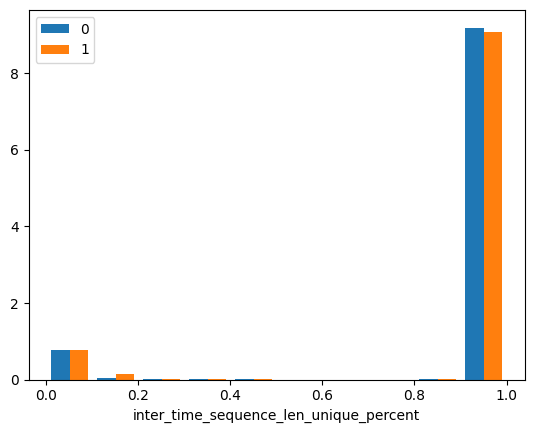

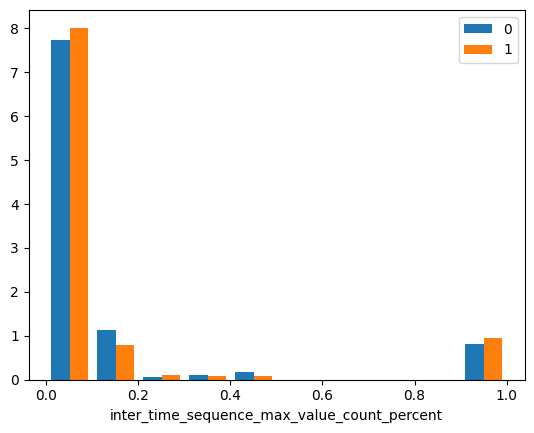

In [38]:
array_1=df['label']==0
array_2=df['label']==1
for i in stat_feat:
    plt.figure()
    plt.hist([np.array(df[array_1][i]), np.array(df[array_2][i])], density=True)
    plt.xlabel(i)
    plt.legend(['0','1'])
    plt.show

In [49]:
max_loss=df_lossy['num_packet_loss'].max()
df_lossy.loc[767883,['num_packet_loss','num_packets']]

num_packet_loss    5771
num_packets         179
Name: 767883, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

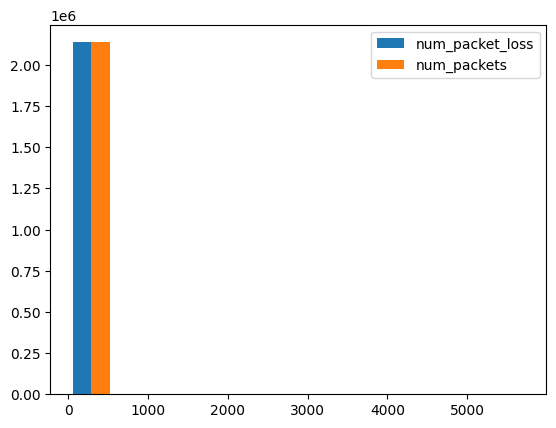

In [51]:
plt.figure()
plt.hist([np.array(df['num_packet_loss']), np.array(df['num_packets'])])
plt.legend(['num_packet_loss','num_packets'])
plt.show

[(0.0, 9.0)]

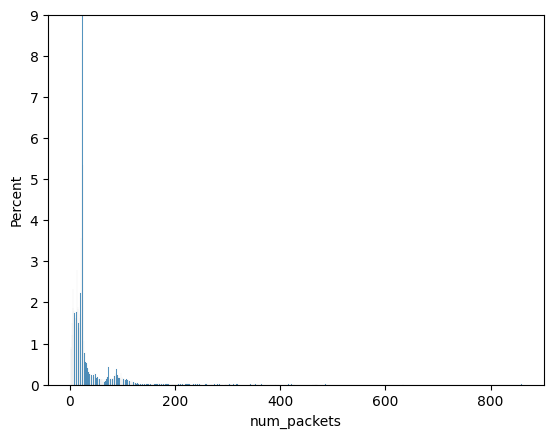

In [62]:
z=sns.histplot(data=df[array_2],x='num_packets',stat='percent')
z.set(ylim=(0, 9))

In [4]:
array_2=df['label']==1
df[array_2]['num_packet_loss'].value_counts().head(11)

num_packet_loss
1     21676
2      4545
3      1779
4       880
5       560
6       430
7       313
8       227
9       201
10      160
11      136
Name: count, dtype: int64

In [87]:
print(df[array_2]['num_packets'].describe())
print(df[array_2]['num_packet_loss'].describe())

count    32479.000000
mean        29.409095
std         29.873316
min          2.000000
25%         16.000000
50%         24.000000
75%         25.000000
max        859.000000
Name: num_packets, dtype: float64
count    32479.000000
mean         6.680317
std         88.938493
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5771.000000
Name: num_packet_loss, dtype: float64


In [5]:
df_copy=df[array_2]
df_copy['new']=df[array_2]['num_packet_loss']/df[array_2]['num_packets']*100
print(df_copy['new'].describe())
df_copy[df_copy['new']>100]

count    32479.000000
mean        24.743420
std        178.704298
min          0.273973
25%          4.166667
50%          4.347826
75%         12.500000
max      13866.666667
Name: new, dtype: float64


C:\Users\utente\AppData\Local\Temp\ipykernel_17612\249799209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['new']=df[array_2]['num_packet_loss']/df[array_2]['num_packets']*100


,timestamp,interarrival_std,interarrival_mean,interarrival_min,interarrival_max,interarrival_count,interarrival_kurtosis,interarrival_skew,interarrival_moment3,interarrival_moment4,...,software,ssrc,ip_src,ip_dst,prt_src,prt_dst,p_type,n_call,label,new
19195,2020-12-14 14:59:19.000,0.020925,0.009054,0.000000e+00,0.096948,38,7.884997,2.885372,0.000025,1.978472e-06,...,webrtc,0x1662dbe0,130.61.36.196,192.168.1.126,10000,39094,100,2,1,136.842105
19210,2020-12-14 14:59:26.500,0.014314,0.008871,0.000000e+00,0.059930,56,3.545157,2.054084,0.000006,2.650718e-07,...,webrtc,0x1662dbe0,130.61.36.196,192.168.1.126,10000,39094,100,2,1,176.785714
34510,2020-12-14 14:34:12.000,0.066144,0.049534,1.425743e-04,0.170142,10,-0.197417,1.240191,0.000306,4.345285e-05,...,webrtc,0x73ee401c,130.61.36.196,192.168.1.126,10000,39094,111,2,1,140.000000
34511,2020-12-14 14:34:12.500,0.050911,0.043209,5.166531e-03,0.161427,9,1.240702,1.567837,0.000173,2.251013e-05,...,webrtc,0x73ee401c,130.61.36.196,192.168.1.126,10000,39094,111,2,1,122.222222
34515,2020-12-14 14:34:14.500,0.065030,0.047484,4.768372e-07,0.160767,11,-0.897178,1.000223,0.000238,3.107901e-05,...,webrtc,0x73ee401c,130.61.36.196,192.168.1.126,10000,39094,111,2,1,136.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103760,2020-05-13 14:44:17.000,0.146339,0.101754,9.536743e-07,0.323371,5,-1.121291,0.744810,0.001670,5.514102e-04,...,webex,0x1e5bc67e,69.26.161.95,192.168.1.94,5004,56813,117,69,1,120.000000
2104476,2020-05-13 14:33:50.000,0.066011,0.040275,0.000000e+00,0.204382,13,1.105671,1.566262,0.000400,6.642326e-05,...,webex,0x48528151,69.26.161.95,192.168.1.94,5004,56813,117,69,1,107.692308
2112540,2020-05-13 14:02:22.000,0.053271,0.258261,2.205930e-01,0.295929,2,-2.000000,0.000000,0.000000,2.013213e-06,...,webex,0x80a13b78,69.26.161.95,192.168.1.94,5004,56813,117,69,1,150.000000
2117627,2020-05-13 14:33:50.000,0.014960,0.006965,0.000000e+00,0.109386,78,26.878571,4.564642,0.000015,1.458302e-06,...,webex,0x926e89d4,69.26.161.95,192.168.1.94,5004,56813,117,69,1,130.769231


In [6]:
df_copy=df_copy[df_copy['new']<100]
df_copy['new'].describe()

count    30820.000000
mean        10.140958
std         13.534644
min          0.273973
25%          4.166667
50%          4.347826
75%         10.000000
max         99.421965
Name: new, dtype: float64

(array([1.3080e+03, 1.5370e+03, 1.2080e+03, 1.0863e+04, 3.0550e+03,
        8.7000e+02, 1.2300e+03, 6.2600e+02, 2.0530e+03, 5.7000e+02,
        5.1100e+02, 1.3200e+02, 6.6900e+02, 1.0810e+03, 8.7000e+01,
        1.9800e+02, 5.6200e+02, 2.1200e+02, 1.6200e+02, 4.8700e+02,
        5.5000e+01, 1.7200e+02, 8.7000e+01, 6.2000e+01, 4.1200e+02,
        1.1000e+01, 1.6400e+02, 2.6000e+01, 1.2100e+02, 7.6000e+01,
        5.2000e+01, 5.4000e+01, 5.0000e+00, 3.3800e+02, 4.5000e+01,
        3.5000e+01, 4.2000e+01, 5.8000e+01, 5.0000e+01, 1.3000e+02,
        4.0000e+01, 3.2000e+01, 6.2000e+01, 2.0000e+01, 6.4000e+01,
        3.7000e+01, 2.0000e+01, 1.8000e+01, 3.0000e+00, 2.9300e+02,
        1.0000e+00, 5.0000e+00, 2.5000e+01, 2.2000e+01, 1.4000e+01,
        4.6000e+01, 3.3000e+01, 2.2000e+01, 1.6000e+01, 5.5000e+01,
        5.0000e+00, 7.0000e+00, 3.4000e+01, 1.6000e+01, 1.0000e+01,
        3.0000e+00, 8.4000e+01, 3.0000e+00, 2.1000e+01, 1.3000e+01,
        6.0000e+00, 2.9000e+01, 2.7000e+01, 5.00

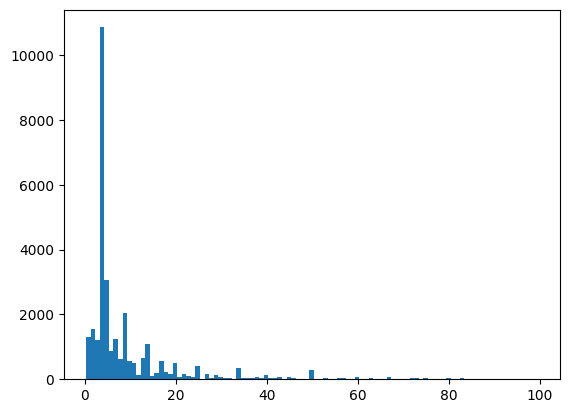

In [8]:
plt.hist(df_copy['new'], bins=99)

[(-0.1, 60.0)]

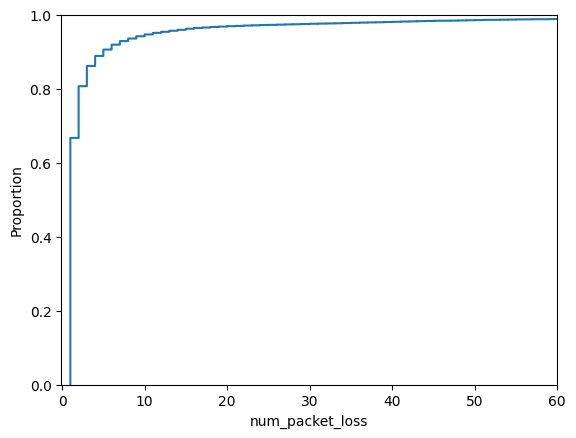

In [35]:
#correct ECDF
array_2=df['label']==1
df_lossy=df[array_2]

g=sns.ecdfplot(
    data = df_lossy,
    x = 'num_packet_loss' # the column that you want to compute ecdf, they will be in the order from short to long length (numerical order)
)
g.set(xlim=(-.1, 60))

In [73]:
step=500
#sum_loss=df.loc[0:500,'num_packet_loss'].sum()
x_ax = np.linspace(0,len(df),42758)
x_ax= np.floor(x_ax)
start=0
losses=[]
for j in x_ax:
    sum_loss=df.loc[start:j,'num_packet_loss'].sum()
    start=j
    losses.append(sum_loss)


# sns.ecdfplot(
#     data = df,
#     x = 'timestamp', # the column that you want to compute ecdf, they will be in the order from short to long length (numerical order)
#     hue = 'type'
# )

In [88]:
TotalLoss=np.sum(df['num_packet_loss'])
LossesPercentage=[]
CntLoss=0
for j in range(df.shape[0]):
    CntLoss=CntLoss+df.loc[j,'num_packet_loss']
    Percent=CntLoss/TotalLoss
    LossesPercentage.append(Percent)







<Axes: >

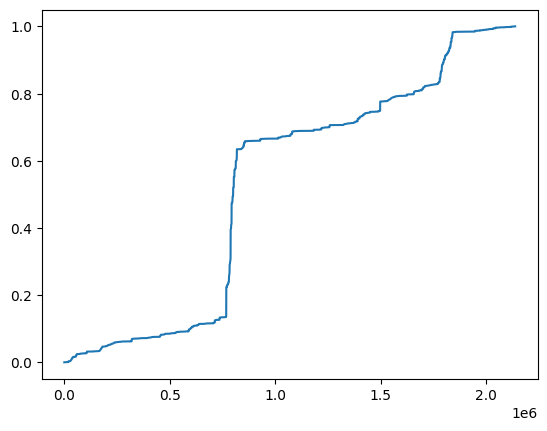

In [95]:
sns.lineplot(
    x = range(len(LossesPercentage)), # which column to use for x-axis
    y = LossesPercentage, # which column to use for y-axis
)
#plt.show()

<Axes: >

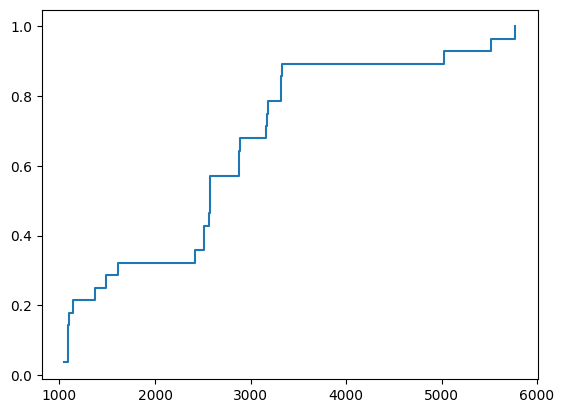

In [103]:
Filtered=(df['num_packet_loss'])[df['num_packet_loss']>1000]
ecdf_values=np.arange(1,len(Filtered)+1)/len(Filtered)
sns.lineplot(x=sorted(Filtered),y=ecdf_values,drawstyle='steps-post')
#sns.ecdfplot(
#    data = df[Filtered],
#    x ='num_packet_loss', # the column that you want to compute ecdf, they will be in the order from short to long length (numerical order)
#)

In [64]:
x_ax = np.linspace(0,len(df),213793)
x_ax

array([0.00000000e+00, 1.00000327e+01, 2.00000655e+01, ...,
       2.13790700e+06, 2.13791700e+06, 2.13792700e+06])

In [72]:
len(df)/50

42758.54

In [34]:
df['num_packet_loss'].max()

5771

<Axes: ylabel='num_packets'>

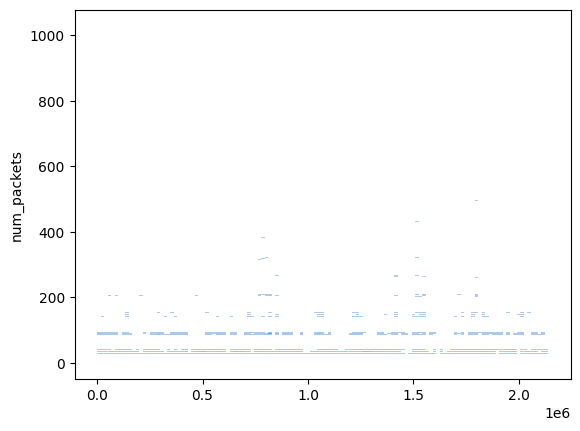

In [36]:
sns.histplot(data=df,x=range(len(df)), y='num_packets')

<Axes: ylabel='num_packet_loss'>

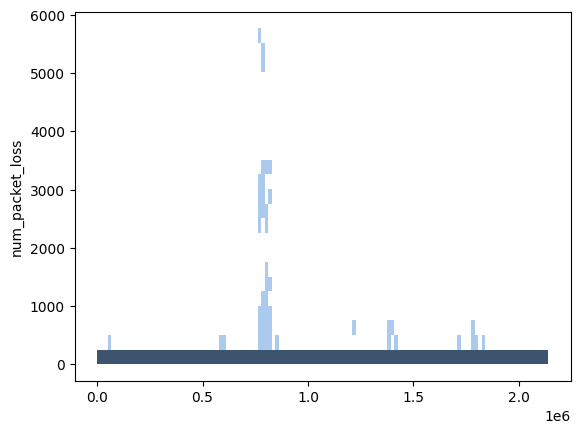

In [37]:
sns.histplot(data=df,x=range(len(df)), y='num_packet_loss')

In [56]:
np.max(df['num_packets'])
print(set(df['num_packet_loss']))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 1088, 1094, 71, 72, 73, 74, 587, 76, 1096, 78, 1609, 75, 79, 82, 595, 83, 85, 598, 80, 88, 89, 90, 91, 3164, 87, 86, 95, 96, 97, 94, 99, 3171, 101, 102, 104, 617, 105, 530, 108, 109, 110, 111, 3184, 113, 114, 115, 2567, 1141, 118, 116, 120, 112, 122, 121, 119, 127, 128, 129, 534, 132, 133, 2571, 136, 137, 5771, 140, 653, 141, 142, 144, 147, 148, 149, 150, 152, 153, 161, 1050, 164, 165, 2577, 167, 169, 170, 172, 2580, 182, 695, 186, 187, 190, 193, 194, 196, 197, 198, 711, 200, 718, 719, 206, 720, 208, 211, 212, 213, 215, 216, 217, 220, 106, 226, 228, 230, 231, 234, 235, 237, 238, 241, 244, 3322, 3323, 3328, 261, 267, 272, 274, 275, 282, 283, 284, 798, 288, 802, 299, 301, 307, 827, 2880, 321, 2883, 2887, 328, 844, 347, 1372, 

In [77]:
sns.ecdfplot(
    data = df,
    x = df.loc[x_ax,'num_packet_loss'], # the column that you want to compute ecdf, they will be in the order from short to long length (numerical order)
)

KeyError: '[2137927.0] not in index'